In [18]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# ===== 설정 =====
folder_path = r"C:\Users\user\Desktop\Drive파일\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\1. 실험자료\5. Revision experiment\260122_최종실험-일렉트로미터\csv파일"

ylim_scale = None
ylim_scale = (-1.5, 0.1) 

[SKIP] already cleaned (2 columns): Aloe_2.csv


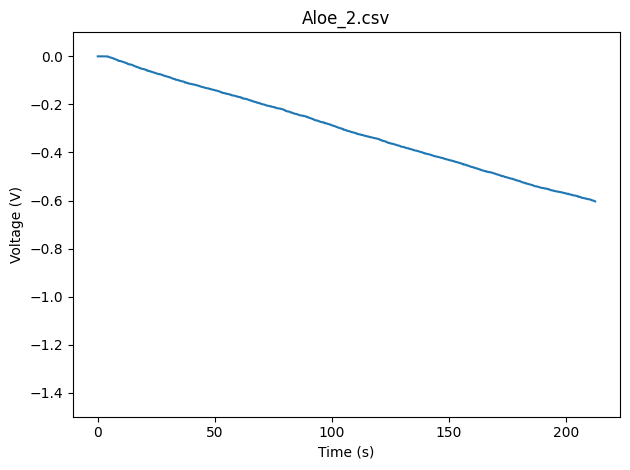

[SKIP] already cleaned (2 columns): Aloe_3.csv


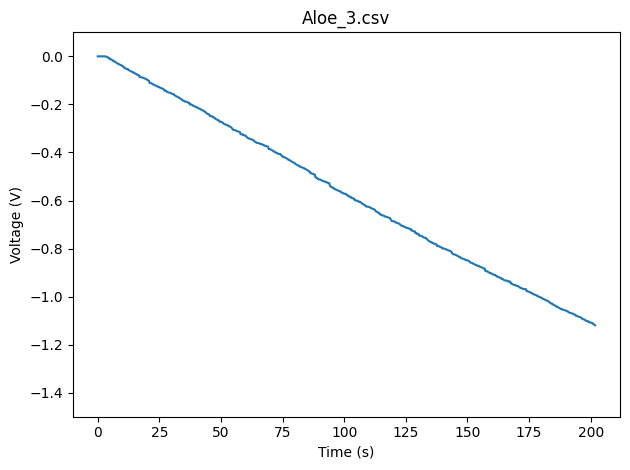

[SKIP] already cleaned (2 columns): Aloe_4.csv


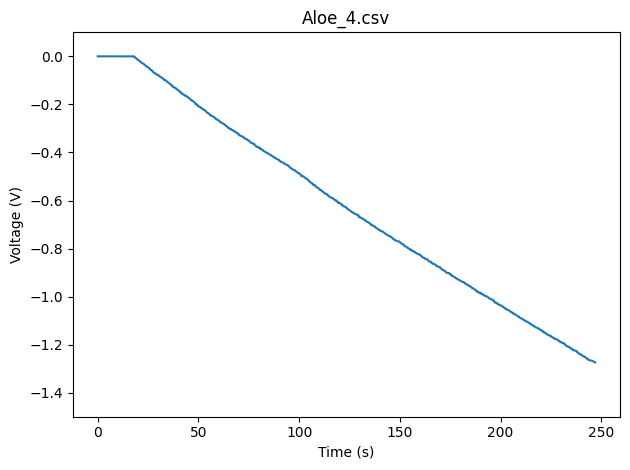

[SKIP] already cleaned (2 columns): Aloe_5.csv


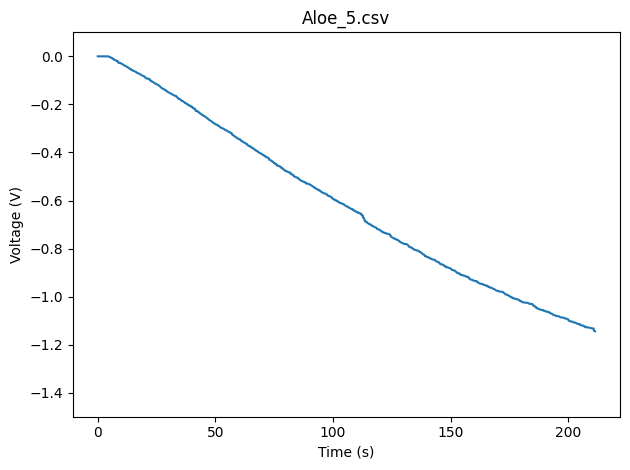

[SKIP] already cleaned (2 columns): Conv_1.csv


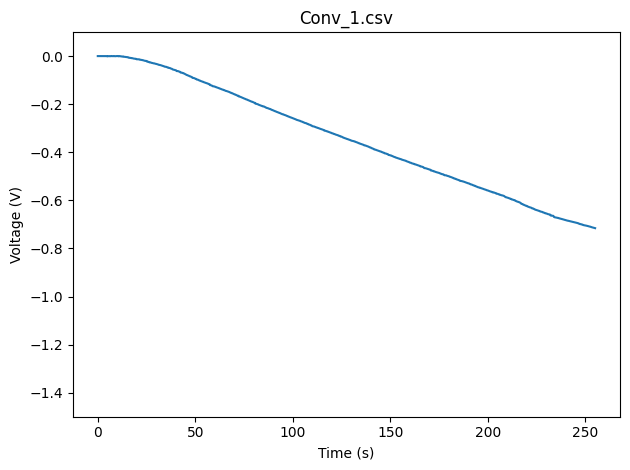

[SKIP] already cleaned (2 columns): Conv_2.csv


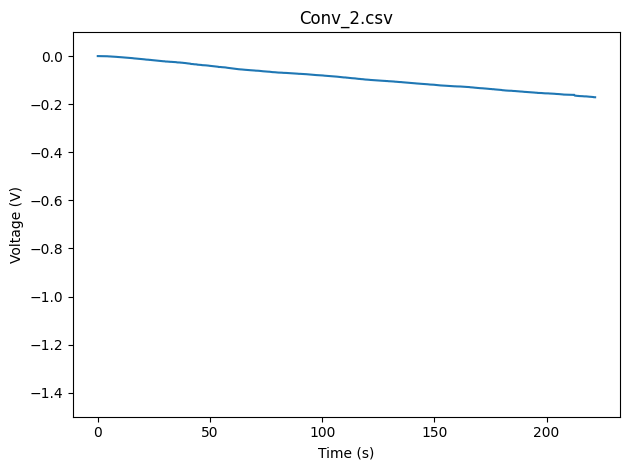

[SKIP] already cleaned (2 columns): Conv_3.csv


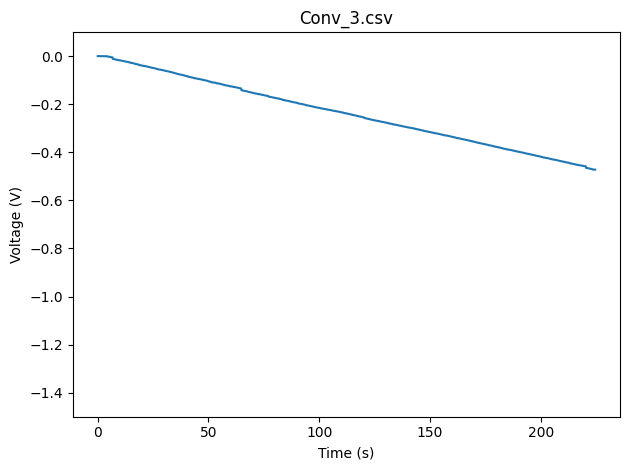

[SKIP] already cleaned (2 columns): Conv_4.csv


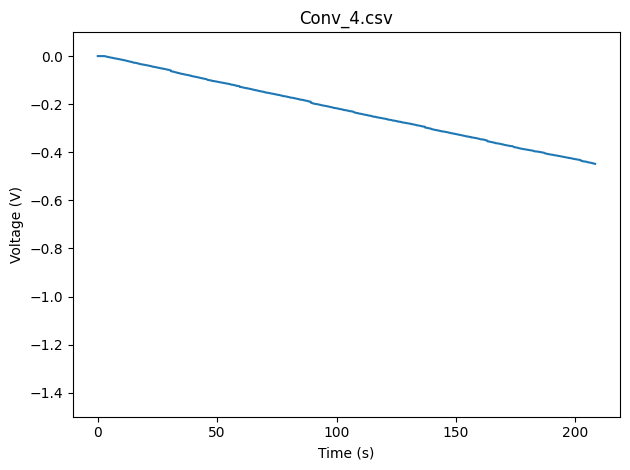

In [19]:
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))

if not csv_files:
    raise FileNotFoundError(f"CSV 파일이 없습니다: {folder_path}")

def read_raw_and_clean(fp, encoding="utf-8"):
    """
    raw 파일:
    - 상단 22행 skip
    - 3열 (idx, time, voltage)
    → time, voltage (2열) 반환
    """
    df = pd.read_csv(
        fp,
        skiprows=22,
        header=None,
        usecols=[0, 1, 2],
        encoding=encoding
    )

    df.columns = ["idx", "time", "voltage"]

    df["idx"] = pd.to_numeric(df["idx"], errors="coerce")
    df["time"] = pd.to_numeric(df["time"], errors="coerce")
    df["voltage"] = pd.to_numeric(df["voltage"], errors="coerce")

    df = df.dropna(subset=["idx", "time", "voltage"])
    df = df.sort_values("idx")

    return df[["time", "voltage"]]

def read_clean(fp, encoding="utf-8"):
    """
    clean 파일:
    - header 없음
    - 2열 (time, voltage)
    """
    df = pd.read_csv(fp, header=None, encoding=encoding)

    if df.shape[1] < 2:
        raise ValueError("정제 파일인데 열이 2개 미만입니다.")

    df = df.iloc[:, :2]
    df.columns = ["time", "voltage"]

    df["time"] = pd.to_numeric(df["time"], errors="coerce")
    df["voltage"] = pd.to_numeric(df["voltage"], errors="coerce")

    return df.dropna(subset=["time", "voltage"])

for fp in csv_files:
    fname = os.path.basename(fp)

    # --- 파일 구조 빠르게 판별 (열 개수만 확인) ---
    try:
        probe = pd.read_csv(fp, nrows=1, header=None, encoding="utf-8")
    except UnicodeDecodeError:
        probe = pd.read_csv(fp, nrows=1, header=None, encoding="cp949")

    # =============================
    # case 1) 이미 정제된 파일 (2열)
    # =============================
    if probe.shape[1] == 2:
        print(f"[SKIP] already cleaned (2 columns): {fname}")

        try:
            df_plot = read_clean(fp, encoding="utf-8")
        except UnicodeDecodeError:
            df_plot = read_clean(fp, encoding="cp949")

    # =============================
    # case 2) raw 파일 (3열 이상)
    # =============================
    else:
        print(f"[CLEAN] processing raw file: {fname}")

        try:
            df_plot = read_raw_and_clean(fp, encoding="utf-8")
        except UnicodeDecodeError:
            df_plot = read_raw_and_clean(fp, encoding="cp949")

        # header 없이 덮어쓰기
        df_plot.to_csv(fp, index=False, header=False)
        print(f"[OVERWRITE] cleaned data saved to original file")

    # --- plot은 항상 ---
    plt.figure()
    plt.plot(df_plot["time"], df_plot["voltage"])
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title(fname)
    plt.ylim(ylim_scale)
    plt.tight_layout()
    plt.show()
